In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math
from numpy.fft import fft, fftshift

In [63]:
# функция расчета правых частей системы ДУ
def f(y, t):
   a=0.8
   f=0.1 
   w = 0.1 #*np.pi*f #только при подстановке в нелинейную функкцию #гц
   gam = 0.001
   omega = 0.11*2*np.pi # гц
   y1, y2 = y
   #return [y2,a*math.cos(omega*t)-w**2*y1-gam*y2]
   return [y2, a*math.cos(omega*t)-2*gam*y2 - w**2*y1-y1**3]

In [64]:
N=250
T=100
t=np.linspace(0, T, N)

In [65]:
# решение ДУ
y0=[0, 0] #начальные условия
w=odeint(f, y0, t)

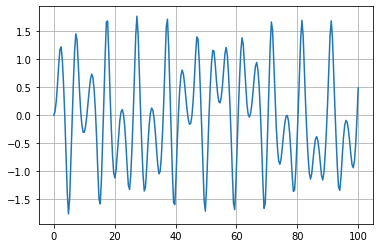

In [66]:
w1=w[:,0];
# график решения ДУ
plt.plot(t,w1)
plt.grid()
plt.show()

In [67]:
# Преобразование Фурье
X = fft(w1,N); # 0..Fmax
# Сдвиг 
Xp = fftshift(X); # -Fmax/2 ... Fmax/2 

In [68]:
dt = T/(N-1)
Fmax = 1/dt; # Максимальная частота сигнала
df=1/T; # Минимальная частота сигнала
Xp_abs = abs(Xp)*dt #спектральная плотность с учетом шага измерений
f1=np.linspace(-Fmax/2,Fmax/2, N )

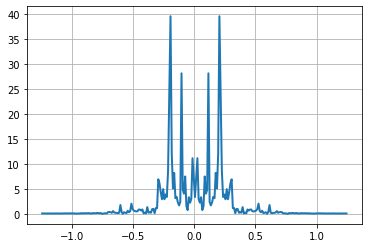

In [69]:
# график спектраолтной плотности (должен быть пик на несущей частоте f и убывающие пики отстоящие от f на
# частоту пропорциональную частоте низкочастотной огибающей составляющей
plt.figure()
plt.plot(f1,Xp_abs,linewidth=2);
plt.grid()
plt.show()